<h1>Introduction</h1>
This project gives some analysis on how the movie scores are associated with factors like budgets, genres, numbers of critics, directors and actors. This repot takes a close look at how these various factors can influence the movie scores.
The data can be found at:
https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset

<h1>Hypotheses</h1>
Based on the dataset, I have the following hypotheses:

    1. Films that has bigger budget will be more likely to rate higher.
    2. The films performed by popular actors tends to have better reviews.
    3. The films by popular directors tends to have better reviews.
    4. Films with more critics tends to have worse reviews.
    5. There are negative relationships between duration and reviews.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
%matplotlib inline
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


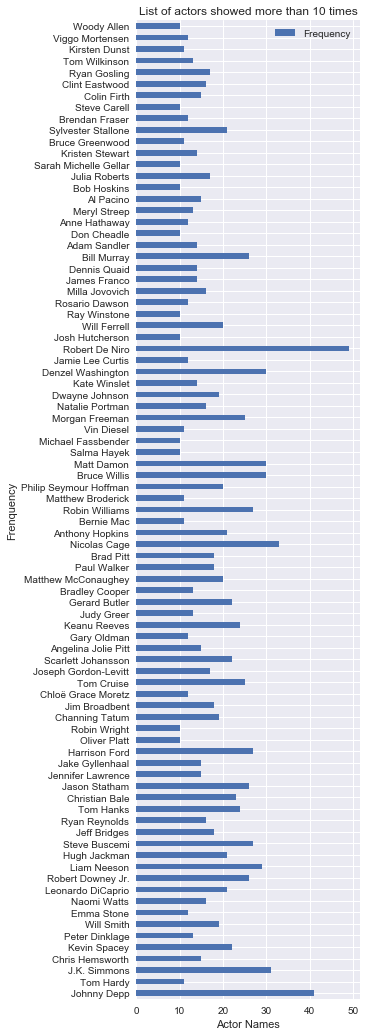

In [3]:
actor_1_counts = Counter(df['actor_1_name'])
result = pd.DataFrame.from_dict(actor_1_counts, orient='index')
popular = {}
min_occus_act = 10
for key, value in actor_1_counts.items():
    if value >=min_occus_act:
        popular[key] = value
rank = Counter(popular)
rank_result = pd.DataFrame.from_dict(rank, orient='index')
rank_result.plot(kind='barh',figsize=(4, 18))
plt.xlabel('Actor Names')
plt.ylabel('Frenquency')
plt.title('List of actors showed more than ' + str(min_occus_act) + ' times')
plt.legend(['Frequency'])
plt.show()

The first graph shows the list of actors that shows more than 10 times in the dataset.

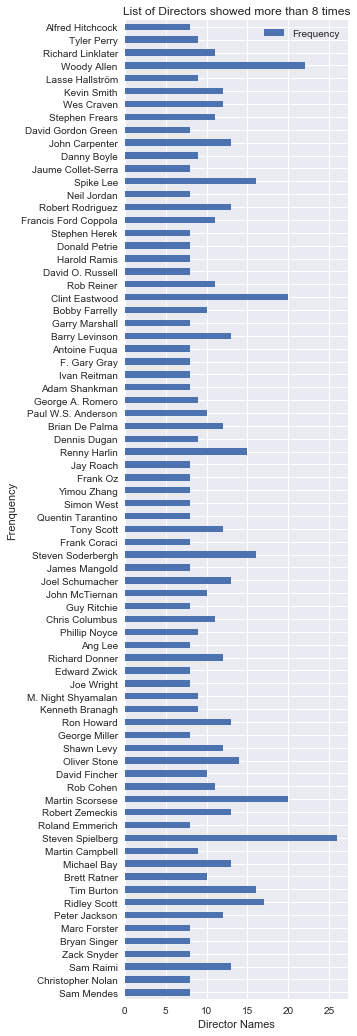

In [7]:

director_counts = Counter(df['director_name'].dropna())
result = pd.DataFrame.from_dict(director_counts, orient='index')
popular = {}
min_occus_dir = 8
for key, value in director_counts.items():
    if value >=min_occus_dir:
        popular[key] = value
rank = Counter(popular)
rank_result = pd.DataFrame.from_dict(rank, orient='index')
rank_result.plot(kind='barh',figsize=(4,18))
plt.xlabel('Director Names')
plt.ylabel('Frenquency')
plt.title('List of Directors showed more than '+ str(min_occus_dir) + ' times')
plt.legend(['Frequency'])
plt.show()

The first graph shows the list of actors that shows more than 8 times in the dataset.

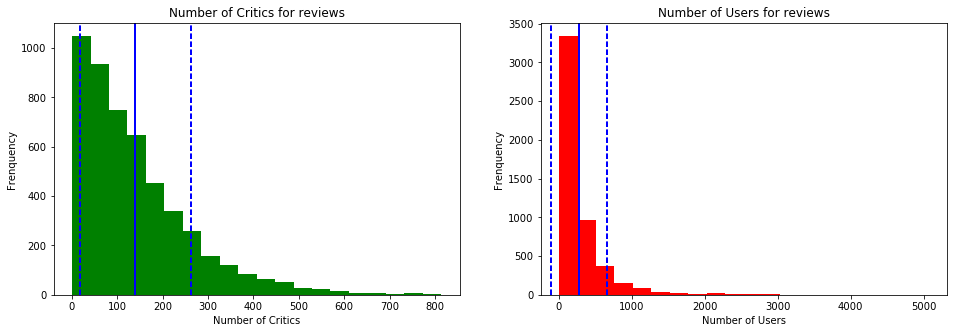

In [22]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.hist(df['num_critic_for_reviews'].dropna(), bins=20, color='green')
plt.axvline(df['num_critic_for_reviews'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['num_critic_for_reviews'].mean() + df['num_critic_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['num_critic_for_reviews'].mean()-df['num_critic_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Number of Critics')
plt.ylabel('Frenquency')
plt.title('Number of Critics for reviews')

plt.subplot(1, 2, 2)
plt.hist(df['num_user_for_reviews'].dropna(), bins=20, color='red')
plt.axvline(df['num_user_for_reviews'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['num_user_for_reviews'].mean() + df['num_user_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['num_user_for_reviews'].mean()-df['num_user_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Number of Users')
plt.ylabel('Frenquency')
plt.title('Number of Users for reviews')
plt.show()

In [ ]:
The histograms above shows the distribution of the number of critics reviews and the number of users for the reviews.In the graphs, the solid line represents the population mean and the dashed lines represents one standard deviation to the left and right of the mean. From the graphs we can conclude that these two columns has similar patterns.

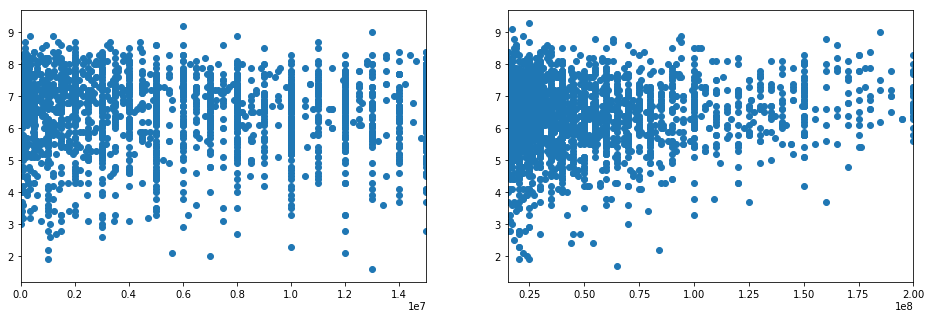

In [21]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
bud_imdb = df[['budget', 'imdb_score']].copy()
bud_imdb = bud_imdb[np.isfinite(df['budget'])]
plt.scatter(x = bud_imdb['budget'], y = bud_imdb['imdb_score'])
plt.xlim(0, 15000000)


plt.subplot(1, 2, 2)
bud_imdb = df[['budget', 'imdb_score']].copy()
bud_imdb = bud_imdb[np.isfinite(df['budget'])]
plt.scatter(x = bud_imdb['budget'], y = bud_imdb['imdb_score'])
plt.xlim(15000000, 200000000)
plt.show()

Above subplots shows the relationship between the movie budgets and movie scores.

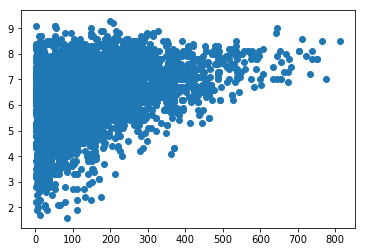

In [4]:
crit_imdb = df[['num_critic_for_reviews', 'imdb_score']].copy()
crit_imdb = crit_imdb[np.isfinite(df['num_critic_for_reviews'])]
plt.scatter(x = crit_imdb['num_critic_for_reviews'], y = crit_imdb['imdb_score'])
plt.show()

This chart shows the relationship between movie scores and number of critic reviews. From the regression line we can conclude that these two numbers are positively corrolated. 

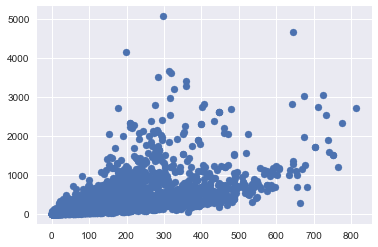

In [6]:
crit_numvoted = df[['num_critic_for_reviews', 'num_user_for_reviews']].copy()
crit_numvoted = crit_numvoted[np.isfinite(df['num_critic_for_reviews'])]
plt.scatter(x = crit_numvoted['num_critic_for_reviews'], y = crit_numvoted['num_user_for_reviews'])
plt.show()

This graph shows how the number of critic reviews and number of voted users are related, which we can see it is also positive related. 

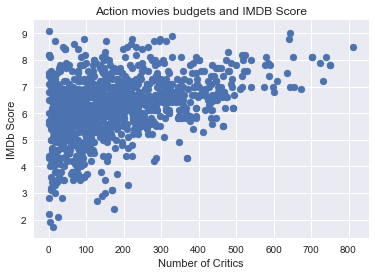

In [4]:
movie_type = 'Action'
act_crit = df[df['genres'].str.contains(movie_type)]
act_crit_imdb = act_crit[['num_critic_for_reviews', 'imdb_score']].copy()
act_crit_imdb = act_crit_imdb[np.isfinite(act_crit['num_critic_for_reviews'])]
plt.scatter(x = act_crit_imdb['num_critic_for_reviews'], y = act_crit_imdb['imdb_score'])
plt.xlabel('Number of Critics')
plt.ylabel('IMDb Score')
plt.title(movie_type +' movies budgets and IMDB Score')
plt.show()


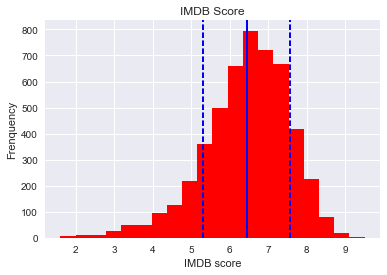

In [5]:
plt.hist(df['imdb_score'].dropna(), bins=20, color='red')
plt.axvline(df['imdb_score'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['imdb_score'].mean() + df['imdb_score'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['imdb_score'].mean()-df['imdb_score'].std(), color='b', linestyle='dashed', linewidth=2) 

plt.xlabel('IMDB score')
plt.ylabel('Frenquency')
plt.title('IMDB Score')

This chart shows the distribution of the movie scores, we can see that it generally shows a negative skewness and the distribution is normal.

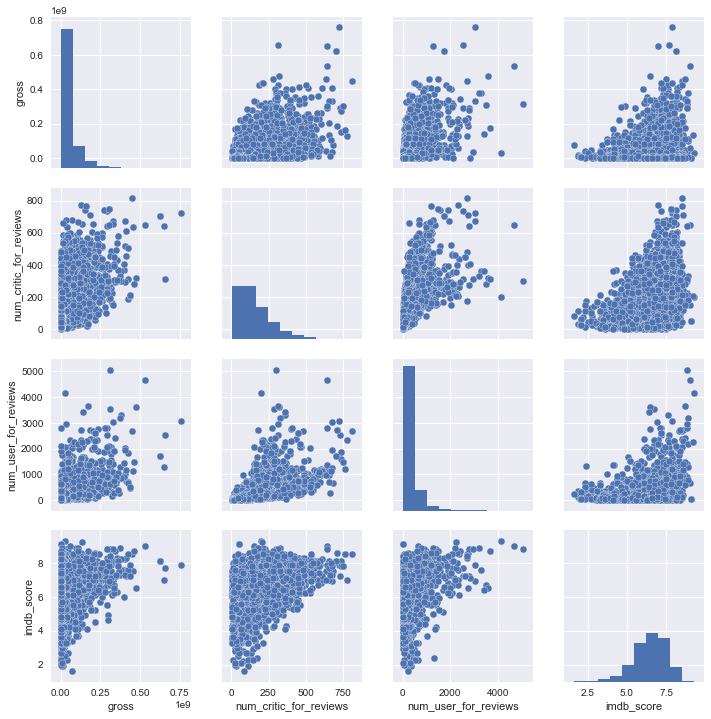

In [33]:
sns.pairplot(df[['gross', 'num_critic_for_reviews', 'num_user_for_reviews','imdb_score']].dropna())

In [ ]:
Add conclusion, t-test, pearson corrolation

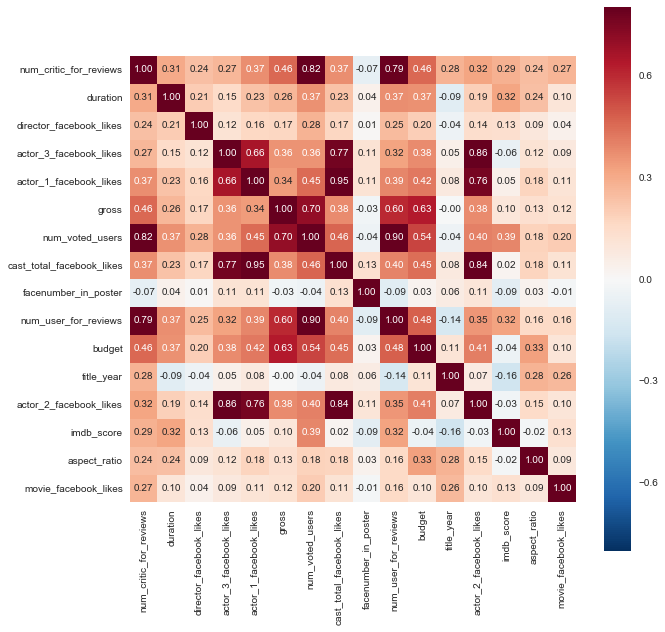

In [8]:
corrmat = df.corr(method='spearman') 
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True,fmt='.2f')
plt.show()

Here we use the Spearson Corrolation to see if the factors are corrolatated, unfortunately, there isn't any strong relationship that the movie score is related to other factors. However ,we do see a very strong positive relationship between the leading actor facebook likes and the cast total facebook likes.
It indicates that leading actors in a movie play a crucial part, people who like the actor is more likely to be a fun of the movie.